In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## support vector classification

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,year,month,neutralized,ColorMix,BreedMix
AnimalID,,,,,,,,,
A671945,Return_to_owner,1,0,1.000000,2014,2,1.0,0,0
A656520,Euthanasia,0,1,1.000000,2013,10,1.0,0,0
A686464,Adoption,1,0,2.000000,2015,1,1.0,0,0
A683430,Transfer,0,0,0.057692,2014,7,0.0,0,0
A667013,Transfer,1,0,2.000000,2013,11,1.0,0,0


In [21]:
#prepare data
X = np.array(data.drop('OutcomeType',axis=1))
Y = np.array(data.OutcomeType)

scaler = preprocessing.MinMaxScaler()

X_scaled = scaler.fit_transform(X)

#Y = Y == 'Adoption' #for binary classification of adoption

x_train, x_test, y_train, y_test = model_selection.train_test_split(X_scaled,Y,train_size=0.7)

In [6]:
#search for a good model
svc = svm.SVC()

gammas = cs = np.array([0.1, 0.3, 1, 3, 10])

lin_dict = {'kernel':['linear'], 'C':cs}
rbf_dict =  {'kernel':['rbf'], 'gamma':gammas, 'C':cs}

clf = model_selection.GridSearchCV(svc, param_grid=rbf_dict)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.617486194103358
{'C': 3.0, 'gamma': 3.0, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.475405,0.248702,0.074891,0.010094,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.600223,0.605799,0.599944,0.597435,0.592303,0.599141,0.004377,25
1,2.266555,0.264390,0.066092,0.006204,0.1,0.3,rbf,"{'C': 0.1, 'gamma': 0.3, 'kernel': 'rbf'}",0.609144,0.613047,0.602732,0.609144,0.599833,0.606780,0.004798,24
2,2.449450,0.113180,0.064862,0.002886,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}",0.614999,0.619738,0.608865,0.615277,0.604573,0.612691,0.005333,19
3,2.685074,0.224718,0.064529,0.007079,0.1,3.0,rbf,"{'C': 0.1, 'gamma': 3.0, 'kernel': 'rbf'}",0.615556,0.622526,0.608587,0.615556,0.607083,0.613862,0.005560,17
4,2.612775,0.219473,0.071616,0.006847,0.1,10.0,rbf,"{'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}",0.614441,0.621132,0.606914,0.613326,0.608756,0.612914,0.004966,18
5,2.123750,0.116709,0.058524,0.001214,0.3,0.1,rbf,"{'C': 0.3, 'gamma': 0.1, 'kernel': 'rbf'}",0.608865,0.615556,0.604126,0.609980,0.601506,0.608007,0.004877,23
6,2.363842,0.070390,0.056546,0.000612,0.3,0.3,rbf,"{'C': 0.3, 'gamma': 0.3, 'kernel': 'rbf'}",0.612490,0.618902,0.607193,0.611932,0.604573,0.611018,0.004926,21
7,2.535134,0.072170,0.056720,0.000803,0.3,1.0,rbf,"{'C': 0.3, 'gamma': 1.0, 'kernel': 'rbf'}",0.613883,0.623362,0.608029,0.614162,0.610151,0.613917,0.005256,16
8,2.491543,0.057340,0.058202,0.001453,0.3,3.0,rbf,"{'C': 0.3, 'gamma': 3.0, 'kernel': 'rbf'}",0.614441,0.623920,0.608308,0.614720,0.611266,0.614531,0.005246,13
9,2.423390,0.047226,0.061342,0.002500,0.3,10.0,rbf,"{'C': 0.3, 'gamma': 10.0, 'kernel': 'rbf'}",0.615835,0.621132,0.605520,0.618623,0.614891,0.615200,0.005312,11


In [7]:
#training score
clf.score(x_train,y_train)

0.6224489795918368

[]

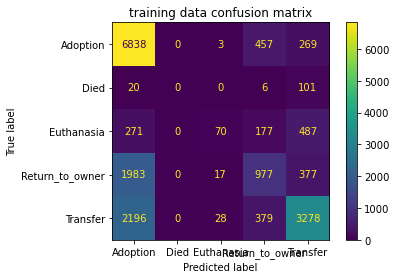

In [8]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train)
plt.title('training data confusion matrix')
plt.plot()

In [9]:
#testing score
clf.score(x_test,y_test)

0.6206582541953948

[]

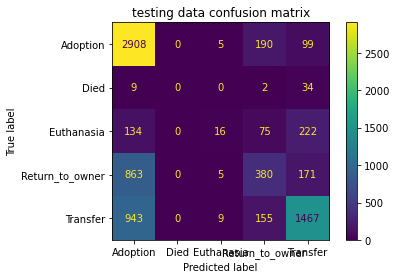

In [10]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test)
plt.title('testing data confusion matrix')
plt.plot()

## random forest

In [22]:
#search a good model
tr = ensemble.RandomForestClassifier()

clf = model_selection.GridSearchCV(tr, param_grid={'max_depth':range(5,15)})

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.6211667403406147
{'max_depth': 7}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086665,0.011437,0.006295,0.000273,5,{'max_depth': 5},0.620853,0.613883,0.610817,0.612211,0.622142,0.615981,0.004625,7
1,0.090518,0.010350,0.007000,0.001013,6,{'max_depth': 6},0.624477,0.626986,0.614162,0.612768,0.625209,0.620721,0.005996,3
2,0.097519,0.006797,0.007815,0.001104,7,{'max_depth': 7},0.626986,0.626150,0.615835,0.611374,0.625488,0.621167,0.006351,1
3,0.110884,0.009066,0.008350,0.000908,8,{'max_depth': 8},0.622526,0.630889,0.615556,0.614162,0.621584,0.620943,0.005947,2
4,0.111162,0.002075,0.007920,0.000194,9,{'max_depth': 9},0.623362,0.625035,0.613326,0.614999,0.622421,0.619828,0.004731,4
5,0.127932,0.007204,0.008965,0.000742,10,{'max_depth': 10},0.621689,0.622526,0.612768,0.611374,0.618795,0.617431,0.004569,5
6,0.160022,0.012675,0.010952,0.001585,11,{'max_depth': 11},0.617786,0.625592,0.610817,0.609980,0.616286,0.616092,0.005628,6
7,0.175179,0.011067,0.011160,0.000799,12,{'max_depth': 12},0.614441,0.614999,0.608865,0.605799,0.608199,0.610460,0.003629,8
8,0.174020,0.007540,0.010913,0.000438,13,{'max_depth': 13},0.611374,0.610817,0.602453,0.606356,0.610151,0.608230,0.003381,9
9,0.169704,0.006104,0.010704,0.000320,14,{'max_depth': 14},0.608029,0.606914,0.603290,0.603290,0.609314,0.606167,0.002469,10


In [23]:
#training score
clf.score(x_train,y_train)

0.6337125013940003

[]

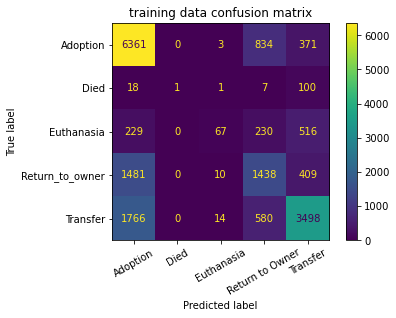

In [24]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.plot()

In [25]:
#testing score
clf.score(x_test,y_test)

0.6295043580070249

[]

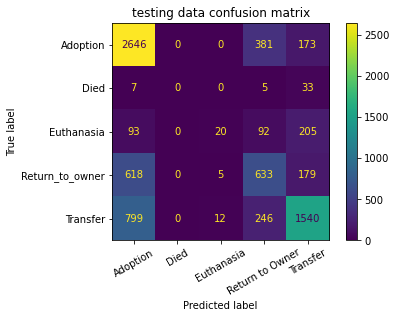

In [29]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.plot()